# house price prediction project from kaggle

- [based on kaggle competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)


* steps to take:
    * read the data
    * visualize and make sense of data
    * clean the data
    * build models
    * pick one and tune it
    * export model (optional)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import data
housing_data_train = pd.read_csv("train.csv")
housing_data_test = pd.read_csv("test.csv")

In [4]:
housing_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing_data_train.isna().sum().head(10)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [11]:
housing_data_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

## <span style="color:blue">*use this after cleaning the data*</span>.

IndexError: Inconsistent shape between the condition and the input (got (81, 1) and (81,))

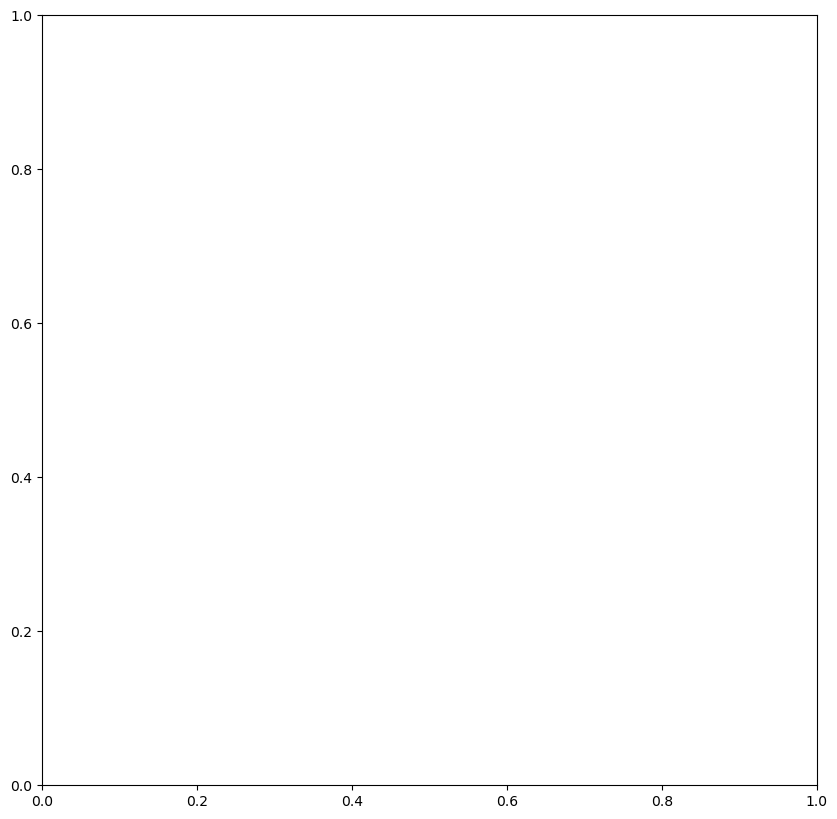

In [12]:
## use this after cleaning the data
# ## visualize corralation matrix
# corr_matrix = housing_data_train.corr()
# fig, ax = plt.subplots(figsize=(10,10))
# ax = sns.heatmap(housing_data_train.dtypes!="object",
#                  cmap="YlBu",
#                  annot=True,
#                  linewidths=1,
#                  ftm=".2f")

(0.0, 13.0)

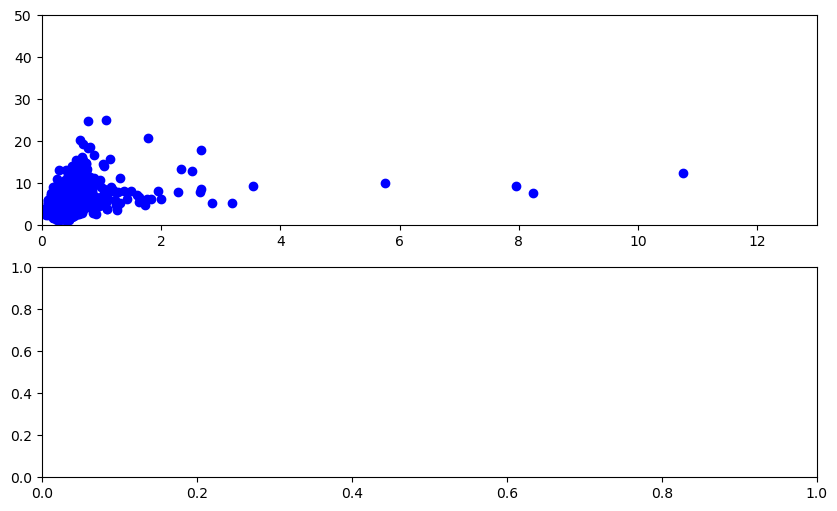

In [35]:
## plot the relationship between LotArea & YearBuilt and saleprice
fig , (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,6))

scatter = ax1.scatter(x= housing_data_train["LotArea"]/20000,
                      y= housing_data_train["SalePrice"]/30000,
                      c="blue")
ax1.set_ylim((0,50))
ax1.set_xlim((0,13))